In [217]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:100px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" Color="red">ch10. "N-Dimensional Arrays 1p~3p"</font></b>
- [numpy](http://www.numpy.org)
- [numpy.docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬 개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절. 넘파이 패키지

In [4]:
import numpy as np
np.__version__

'1.23.5'

In [8]:
# np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a = np.arange(15) #0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [11]:
from numpy import arange 
a = arange(15).reshape(3,5) #3행 5열자리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [34]:
from numpy import arange 
a = arange(15,
          dtype=np.int8 #int는 기본이 32비트짜리. 근데 8비트짜리로 달라고함. int8은 최대 수가 21억 얼마라고 함. 공부해보자. 데이터는 8의제곱단위로
          ).reshape(3,5) #3행 5열자리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]], dtype=int8)

In [35]:
type(a)

numpy.ndarray

In [36]:
a.dtype #a배열의 요소들의 타입

dtype('int8')

In [37]:
a.dtype.name

'int8'

In [38]:
a.itemsize # a배열 안의 한 요소의 bytesize #시스템이 정수(int)를 기본저장할 때 32비트 기준 무조건 4바이트가 됨. 실수(float)는 무조건 64비트에 8바이트
#4바이트 * 15가지 숫자 = a는 총 60바이트짜리 데이터임

1

In [39]:
a.ndim #축수(차원수)

2

In [40]:
a.size #배열 요소의 갯수

15

In [41]:
a.shape #배열의 구조(3행 5열)

(3, 5)

In [42]:
print('shape 조정 전 a\n', a)
a.shape = (5, 3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [44]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]], dtype=int8)

## 1.2 배열 타입 변경

In [75]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [76]:
a.size #요소갯수

12

In [77]:
a.dtype

dtype('int32')

In [78]:
a.itemsize

4

In [79]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다
a.dtype

dtype('int64')

In [69]:
a #16의 8승(16^8)블라블라. 개어려움

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [80]:
a.itemsize

8

In [83]:
a.size

6

In [84]:
# 배열요소의 타입을 수정
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [85]:
a = a.astype('int64')
#a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [86]:
a.itemsize

8

In [87]:
a.size

12

In [92]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [93]:
a.ravel() #flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [94]:
a.flatten() #함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체 저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷)

In [91]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [96]:
import pickle
with open('data/ch10.pkl', 'wb') as f: #바이너리모드이기에 utf이런거 무상관
    pickle.dump(a, f)

In [97]:
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

In [98]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [99]:
%%time
np.save('data/ch10.npy', a) #저장

CPU times: total: 0 ns
Wall time: 2.05 ms


# 2절. 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list, tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeros(엄청 많이 쓰임), full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random.~

## 2.1 array()함수로 넘파이 배열 만들기
    - array(obj, dtype=np.int32 나 'int32', copy=T/F) 

In [132]:
a = np.array([2, 4, 6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [133]:
a[0], a[1], a[2]

(2, 4, 6)

In [134]:
for i in a:
    print(i, end='\t') #이렇게 for문도 사용가능

2	4	6	

In [135]:
#2차원 배열 만들어보기
b = np.array([ [1.0, 2.3], #배열은 동일 자료형의 집합 : 정수->실수->문자
              [4,   5]])
b

array([[1. , 2.3],
       [4. , 5. ]])

In [136]:
b[0][1], b[0,1] #후자를 더 많이씀 #2차원일 경우에는 [axis0 = 행, axis1 = 열]

(2.3, 2.3)

In [137]:
l = [ [1.0, 2.3], [4,   5]]
l[0][1] #0번째 리스트에서 1번째 요소만 꺼내는 것을 의미

2.3

In [138]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [139]:
b = b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1. , 2.3],
       [4. , 5. ]], dtype=float32)

In [140]:
print(b.dtype)
print(b.itemsize)

float32
4


In [142]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() #개행

1.0	2.3	
4.0	5.0	


In [149]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print() #개행

0행0열 : 1.0(1.0)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [150]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [197]:
# print(b[3,1]) = 없는 인덱싱이라 에러남
print("0~1행의 각 1~2열 :", b[0:2, 1:3]) #0~1행의 각 1~2열
print("2행전체 :", b[2,:], b[2]) #행만 써도 모든 행 추출 가능
print("각 행의 끝 숫자 :", b[:,4], b[...,4], b[:, -1])  #모든 행이라 : 넣은것
print("2행 0~2열 :", b[2, 0:-2]) # -x 마이너스 들어가면 x전 열까지
print("모든 행의 마지막 열 제외 나머지 :",  b[:, :-1]) #모든행, 모든열의-1전까지 

0~1행의 각 1~2열 : [[2 3]
 [7 8]]
2행전체 : [11 12 13 14 15] [11 12 13 14 15]
각 행의 끝 숫자 : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~2열 : [11 12 13]
모든 행의 마지막 열 제외 나머지 : [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [206]:
# 스칼라 변수
a = 10
copy_a = a #복제본
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")
print(id(copy_a))
print(id(a))

a=10, 복제본10
a=10, 복제본-1
2414697906352
2414697906704


In [207]:
# 데이터 구조
a = [0, 1]
copy_a = a.copy() #깊은복사
print(f"a={a}, 복제본{copy_a}")
copy_a = -1
print(f"a={a}, 복제본{copy_a}")
print(id(copy_a))
print(id(a.copy))

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본-1
2414697906352
2414811715904


In [216]:
# numpy 배열
import numpy as np
c = np.array([ [1,2], [3,4] ])
# d = c # 주소 할당
# d = np.array(c, copy=True) #깊은 복사
d = c.copy() #바로 위꺼라 동일
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2414816870192 2414811593392
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64


In [250]:
x = np.zeros( (3,) ) #꼭 튜플로 ! 이러면 3열짜리 1차원 float64 배열이 생김.(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [224]:
x = np.zeros( (2, 5), dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [227]:
np.ones( (2,5), dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [228]:
np.ones( (2,5), dtype=np.int8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [230]:
np.full( (3,3), 125)

array([[125, 125, 125],
       [125, 125, 125],
       [125, 125, 125]])

In [231]:
np.full( (2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

In [236]:
img = np.full( (28,25), 125, dtype=np.uint8)
img.dtype

dtype('uint8')

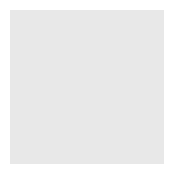

In [246]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) #시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full( (28,28), 1000, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') #축 없애기
plt.show()

In [248]:
import numpy as np
np.empty( (3, 2) ) #초기값이 메모리 상태에 딸 ㅏ다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- 아래 모든 것들은 대부분 실수 난수를 사용함
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 `진짜많이쓰임`
- np.random.uniform(low=0.0, high=1.0, size=tup/실수가능) : low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0, scale=1.0, size=tup/실수가능) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값배열 `진짜많이쓰임 1대장`

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1)

cf) np.random.randint(from, to) : from부터 to미만의 정수 난수 1개 발생 (from 기본값은 0)

In [294]:
import random
random. randint(1, 3) #1, 2, 3

3

In [295]:
np.random.randint(1, 3) #1, 2

2

In [296]:
np.random.random( (2, 3) ) #균등분포

array([[0.24653064, 0.33190911, 0.82837146],
       [0.14414204, 0.17232192, 0.09440539]])

In [297]:
np.random.random( (2,) ) #이 값이 1차원이다? 뭔소리지

array([0.43277267, 0.6547838 ])

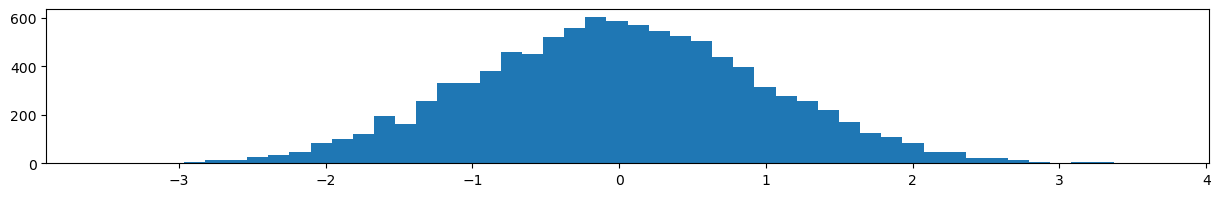

In [301]:
import matplotlib.pyplot as plt
x = np.random.randn(10000) #정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,2)) #그래프 크기
plt.hist(x, bins=50) #구간을 50개로 나눔
plt.show()

In [309]:
#1차원 난수 배열
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) #정규분포

[0.29705097 0.64437687 0.63350571]
[-1.00616031  1.06409016  1.68473871]


In [310]:
# 2차원 난수 배열
np.random.random( (2,5) ) #2행 5열짜리 정규분포 난수 배열

array([[0.42279331, 0.34894992, 0.18226195, 0.41040008, 0.79981615],
       [0.33695914, 0.18454304, 0.54485882, 0.89287659, 0.49801402]])

In [311]:
np.random.uniform(low=-2, high=2, size=(2,5)) #2행 5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 0.77584316,  1.86162766, -1.42121068,  1.31096291, -1.69152905],
       [-0.29165152, -1.24730437, -1.84086485,  0.34539629,  0.11915716]])

In [312]:
np.random.normal(size=(2,5)) #2행 5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[-0.54245486,  1.2038622 , -0.22068239,  0.08825725,  1.02969248],
       [ 0.94127884,  1.00221399,  1.20022067,  0.30135248,  1.8125716 ]])

In [314]:
np.random.normal(-1, 1, size=(2,5)) #2행 5열짜리 정규분포(평균 -1, 표준편차1) 난수 배열

array([[-0.21114753, -0.98230206, -1.60244507, -1.03069454, -2.24802808],
       [ 0.57628013,  0.3533803 , -1.30887892, -1.76764872, -1.63081597]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [316]:
np.arange(10, 30, 5, dtype=np.float64) #정수는 딱 떨어져서 30이포함되지 않지만

array([10., 15., 20., 25.])

In [319]:
np.arange(0, 2.1, 0.3) #실수는 딱 떨어지지 않아서 2.1이 포함된거임. 

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [320]:
np.linspace(0, 5, 6)

array([0., 1., 2., 3., 4., 5.])

In [327]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

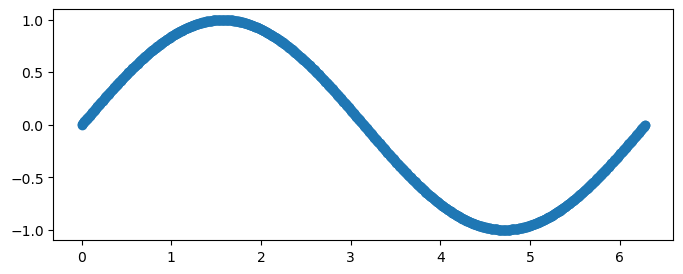

In [328]:
plt.figure(figsize=(8, 3))
plt.scatter(x, y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능 (열 수는 끝 수로 표현가능하지만, 행 수라면?? 잉?)
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [346]:
t = np.random.random( (2,3) )
t

array([[0.1686972 , 0.68725507, 0.83692428],
       [0.15507875, 0.3409132 , 0.77474948]])

In [347]:
[1, 2, 3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [348]:
np.array([1, 2, 3]) * 3

array([3, 6, 9])

In [349]:
a = np.round(t*10) #반올림
a

array([[2., 7., 8.],
       [2., 3., 8.]])

In [350]:
a.astype(np.int16) #a가 바뀌는 게 아니다. astype 처리한걸 리턴했을 뿐
a

array([[2., 7., 8.],
       [2., 3., 8.]])

In [353]:
a.reshape(3, 2)

array([[2., 7.],
       [8., 2.],
       [3., 8.]])

In [355]:
a #리쉐입했지만 원래 a는 그대로

array([[2., 7., 8.],
       [2., 3., 8.]])

In [356]:
a.reshape(-1, 1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[2.],
       [7.],
       [8.],
       [2.],
       [3.],
       [8.]])

In [357]:
a.reshape(3, -1)

array([[2., 7.],
       [8., 2.],
       [3., 8.]])

In [359]:
a.resize(2, 3) #실행결과가 출력 안되면 a가 바뀜
a

array([[2., 7., 8.],
       [2., 3., 8.]])

In [360]:
a.reshape( (3,2) )

array([[2., 7.],
       [8., 2.],
       [3., 8.]])

In [362]:
a.resize(2, -1) #resize는 -1 사용 불가

ValueError: negative dimensions not allowed

In [365]:
a

array([[2., 7., 8.],
       [2., 3., 8.]])

In [367]:
# 전치행렬 (x행y열 -> y행x열)
a.T # a의 전치행렬

array([[2., 2.],
       [7., 3.],
       [8., 8.]])

## 2.6 배열 출력

In [369]:
np.arange(10) #이건 당연히 됨

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [370]:
np.arange(1001) #일정 수를 넘기니 다 안나옴

array([   0,    1,    2, ...,  998,  999, 1000])

In [373]:
# 배열 요소가 몇개까지 다 출력되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [375]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [ ]:
#다 나오게 하고 싶을 때 : 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize) #정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf) #무한대출력

In [ ]:
np.arange(10000).reshape(100,100)